# Data Analysis

Here I work on loading the data for processing

In [48]:
# Importing libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import lecroy
import os
import sys
from scipy.fft import rfft, irfft, rfftfreq

In [80]:
data_folder = 'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora' # Path to data folder
dates = os.listdir(data_folder)
datasets = ['cat1', 'tora1']

def get_file_list(date, dataset):
    folder = os.path.join(data_folder, date, dataset)
    fns = sorted(os.listdir(folder))
    fns = [os.path.join(folder, fn) for fn in fns]
    return fns

files = {dat:{ds:get_file_list(dat, ds) for ds in datasets} for dat in dates}
files

{'091027': {'cat1': ['C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat000deg00000.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat000deg00001.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat000deg00002.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat015deg00000.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat015deg00001.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat015deg00002.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat030deg00000.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat030deg00001.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat030deg00002.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\\cat1\\C1cat045deg00000.trc',
   'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091027\

In [62]:
meta, times, data = lecroy.read(files[dates[0]]['cat1'][0], scale=False)
dt = meta['horiz_interval']
fs = 1/dt
N = len(data[0])
t = np.linspace(0, dt*N, N, endpoint=False)
f = rfftfreq(N, dt)
meta

{'descriptor_name': b'WAVEDESC',
 'template_name': b'LECROY_2_3',
 'comm_type': 0,
 'comm_order': 1,
 'wave_descriptor': 346,
 'user_text': 0,
 'res_desc1': 0,
 'trig_time_array': 160000,
 'ris_time_array': 0,
 'res_array1': 0,
 'wave_array1': 1270000,
 'wave_array2': 0,
 'res_array2': 0,
 'res_array3': 0,
 'instrument_name': b'LECROYWR6050A',
 'instrument_number': 14852,
 'trace_label': b'',
 'reserved1': 24816,
 'reserved2': 19,
 'wave_array_count': 1270000,
 'points_per_screen': 1250000,
 'first_valid_point': 0,
 'last_valid_point': 1269999,
 'first_point': 0,
 'sparsing_factor': 1,
 'segment_index': 0,
 'subarray_count': 10000,
 'sweeps_per_acq': 1,
 'points_per_pair': 0,
 'pair_offset': 0,
 'vertical_gain': 0.0008838911890052259,
 'vertical_offset': 0.0,
 'max_value': 90.0,
 'min_value': -91.0,
 'nominal_bits': 8,
 'nom_subarray_count': 10000,
 'horiz_interval': 3.999999886872274e-09,
 'horiz_offset': -2.5073424676020796e-07,
 'pixel_offset': -2.5000000000000004e-07,
 'vert_unit':

In [63]:
for ds in datasets:
    data = np.array([[
        lecroy.read(f, scale=False)[2] for f in files[dat][ds]]
                     for dat in dates])
    data = data.squeeze()  # not optical squeezing!
    globals()[ds] = data


In [77]:
data.shape

(3, 39, 10000, 127)

In [68]:
tora1.shape

(3, 39, 10000, 127)

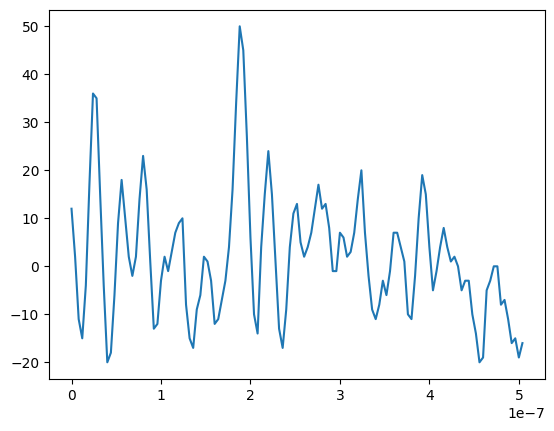

In [75]:
plt.plot(t, tora1[2,38,3])

(0.0, 50000000.0)

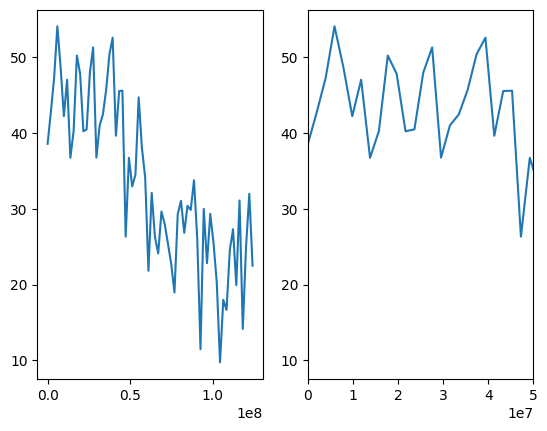

In [66]:
fig, axs = plt.subplots(1, 2)
spec = np.fft.rfft(tora1[0,0,0])
psd = 10*np.log10(np.abs(spec)**2)
axs[0].plot(f, psd)
axs[1].plot(f, psd)
axs[1].set_xlim(0, 50e6)

In [56]:
data

array([[[[-11, -11,  -7, ...,  27,  32,  28],
         [ 10, -10, -22, ...,  18,  21,   9],
         [ 15,  11,  10, ...,   4,  -2,  -8],
         ...,
         [ -8,  -9, -10, ..., -20, -13,  -6],
         [  7,  -9, -19, ...,  -1,  14,  26],
         [-10,  -1,   8, ...,  27,  23,  16]],

        [[  1,  -3,   3, ...,  -8,  -4,  13],
         [ -4, -26, -26, ...,   4,  -5, -15],
         [  4,  21,  16, ...,  -9,  -8, -10],
         ...,
         [-22, -24, -10, ..., -17, -21, -17],
         [-21, -21, -21, ...,  -1,   2,   3],
         [-15,  -9,  -3, ..., -23, -22, -16]],

        [[ -1,  -6,  -9, ...,  16,   9,   1],
         [ 11,  15,  12, ...,  25,  23,  16],
         [  8,  19,  21, ..., -14, -19, -13],
         ...,
         [ 21,   8,  -1, ...,  15,  18,  19],
         [-29, -33, -36, ...,  -3,  12,  17],
         [ 10,  -5, -15, ...,   4,  16,  19]],

        ...,

        [[ -4,  19,  29, ..., -12,  -7, -15],
         [  4,   8,  -5, ...,   5,   9,  14],
         [  7, -12

In [55]:
cat1.shape

(3, 39, 10000, 127)

In [25]:
datasets = [f'cat{i}' for i in range(1, 3)] + [f'tora{i}' for i in range(1, 27)]
datasets

['cat1',
 'cat2',
 'tora1',
 'tora2',
 'tora3',
 'tora4',
 'tora5',
 'tora6',
 'tora7',
 'tora8',
 'tora9',
 'tora10',
 'tora11',
 'tora12',
 'tora13',
 'tora14',
 'tora15',
 'tora16',
 'tora17',
 'tora18',
 'tora19',
 'tora20',
 'tora21',
 'tora22',
 'tora23',
 'tora24',
 'tora25',
 'tora26']

In [28]:
def get_file_list(date, dataset):
    folder = os.path.join(data_folder, date, dataset)
    fns = sorted(os.listdir(folder))
    fns = [os.path.join(folder, fn) for fn in fns]
    return fns

files = {ds:{dat:get_file_list(dat, ds) for dat in dates} for ds in datasets}

FileNotFoundError: [WinError 3] Den angivne sti blev ikke fundet: 'C:\\Users\\tbrav\\OneDrive\\Skrivebord\\data-tora\\091028\\cat2'